# Part 1

In [165]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [166]:
df = pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\D3.csv') # Loads local file
df.head() # To get first n rows from the dataset default value of n is 5 
df

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [167]:
X1 = df.values[:, 0]  # get input values from first column 
X2 = df.values[:, 1]  # get input values from second column 
X3 = df.values[:, 2]  # get input values from third column 
Y = df.values[:, 3]  # get output values from forth column 
m = len(Y) # Number of training examples 
print('X1 = ', X1[: 5]) # Show the first 5 records to verify that the previous code worked as expected 
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5]) 
print('Y = ', Y[: 5]) 
print('m = ', m)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


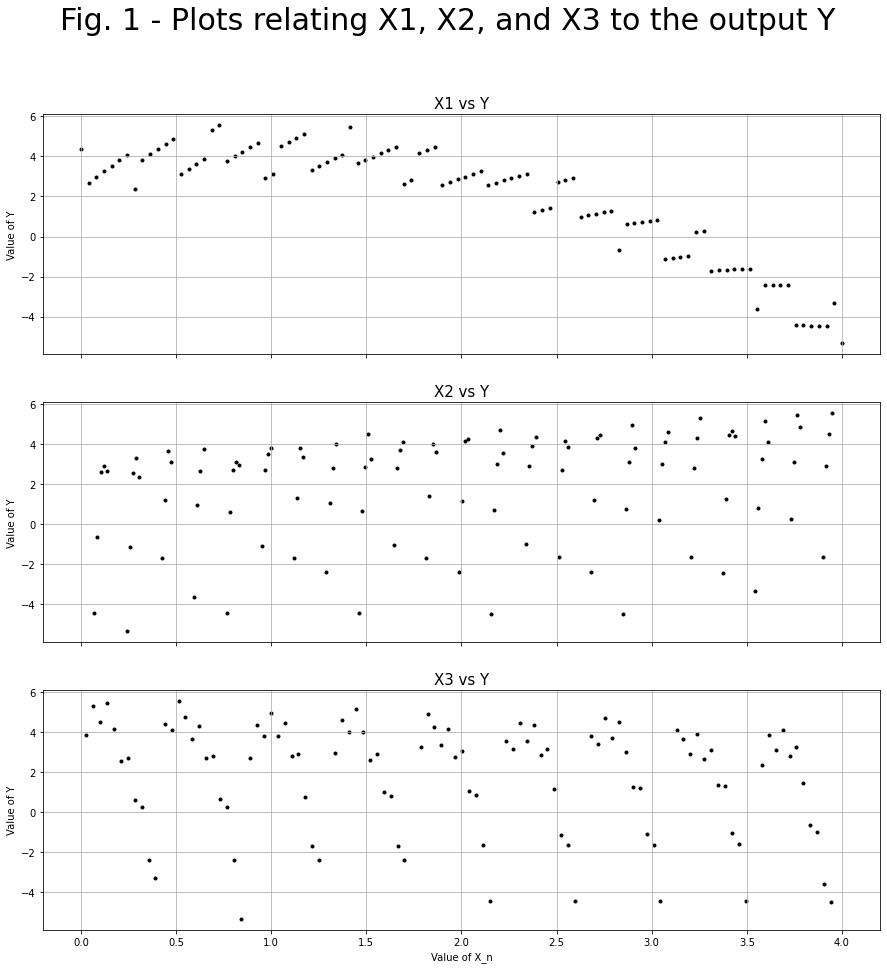

In [168]:
fig1, axs = plt.subplots(3, sharex = True, sharey = True, figsize=(15, 15))
fig1.suptitle('Fig. 1 - Plots relating X1, X2, and X3 to the output Y', fontsize = 30)

axs[0].scatter(X1,Y, color='black',marker= '.')
axs[0].set_title('X1 vs Y', fontsize = 15)
axs[0].grid()

axs[1].scatter(X2,Y, color='black',marker= '.')
axs[1].set_title('X2 vs Y', fontsize = 15)
axs[1].grid()

axs[2].scatter(X3,Y, color='black',marker= '.')
axs[2].set_title('X3 vs Y', fontsize = 15)
axs[2].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Value of X_n', ylabel = 'Value of Y')
    ax.label_outer()

In [169]:
V0 = np.ones((m, 1)) # creates the 1's vector of m length
theta = np.zeros(2)

V1 = X1.reshape(m, 1) # converts X into a vector with dim m by 1
V2 = X2.reshape(m, 1) 
V3 = X3.reshape(m, 1) 

M1 = np.hstack((V0, V1)) # stacks V0 and Vn
M2 = np.hstack((V0, V2))
M3 = np.hstack((V0, V3))

In [170]:
def compute_cost(X, y, theta): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represents an input characteristic 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(1 x m) 

    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 

    Output Parameters 
    ----------------- 
    J : Scalar value. 
    """ 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * len(Y)) * np.sum(sqrErrors) 

    return J 

In [171]:
def gradient_descent(X, y, theta, alpha, iterations): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represents an input characteristic 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(m x 1) 
    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
    alpha : Learning rate. Scalar value typically <= 0.1
    iterations: No of iterations. Scalar value.  

    Output Parameters 
    ----------------- 
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """ 
    cost_history = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / len(Y)) * X.transpose().dot(errors); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, y, theta)  

    return theta, cost_history 

In [183]:
a = 0.05
iterations = 1000

fin_theta1, cost_history1 = gradient_descent(M1, Y, theta, a, iterations)
print(fin_theta1)

fin_theta2, cost_history2 = gradient_descent(M2, Y, theta, a, iterations)
print(fin_theta2)

fin_theta3, cost_history3 = gradient_descent(M3, Y, theta, a, iterations)
print(fin_theta3)

[ 5.92786428 -2.03830369]
[0.73605389 0.55761016]
[ 2.87138935 -0.52046993]


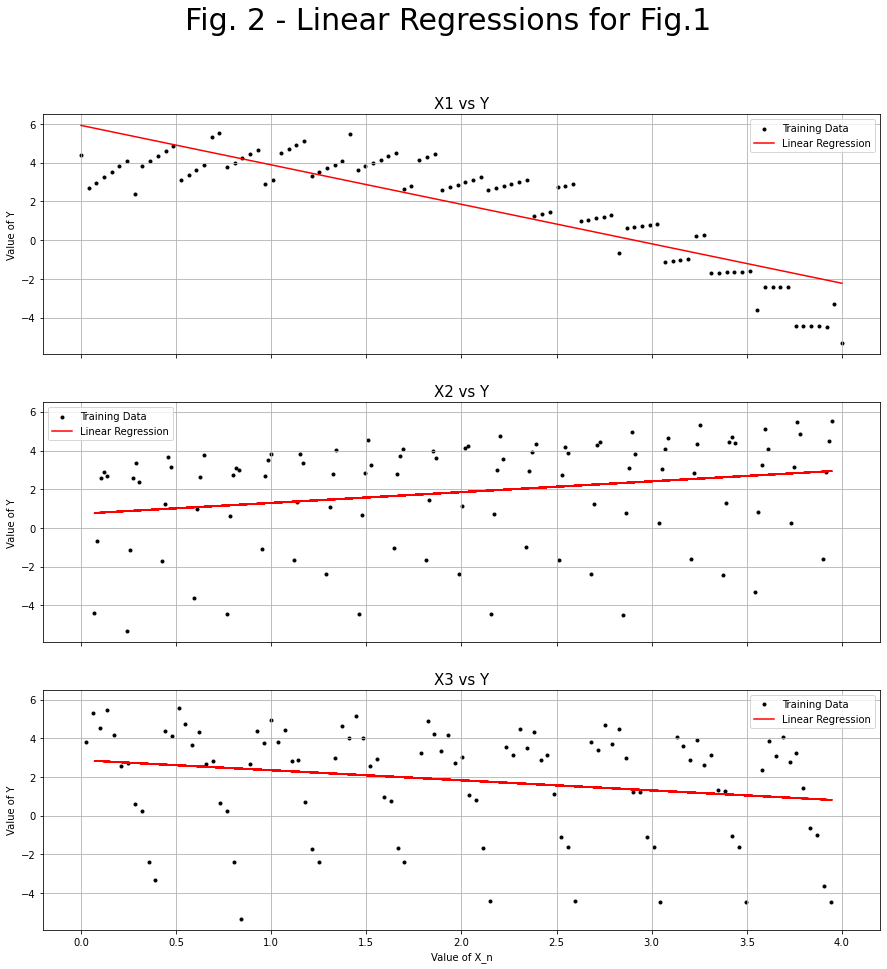

In [173]:
fig2, axs = plt.subplots(3, sharex = True, sharey = True, figsize=(15, 15))
fig2.suptitle('Fig. 2 - Linear Regressions for Fig.1', fontsize = 30)

axs[0].scatter(X1 , Y, color = 'black', marker = '.', label = "Training Data")
axs[0].plot(M1[:,1], M1.dot(fin_theta1), color = 'red', label = "Linear Regression")
axs[0].set_title('X1 vs Y', fontsize = 15)
axs[0].grid()
axs[0].legend()

axs[1].scatter(X2,Y, color='black',marker= '.', label = "Training Data")
axs[1].plot(M2[:,1], M2.dot(fin_theta2), color = 'red', label = "Linear Regression")
axs[1].set_title('X2 vs Y', fontsize = 15)
axs[1].grid()
axs[1].legend()

axs[2].scatter(X3,Y, color='black',marker= '.', label = "Training Data")
axs[2].plot(M2[:,1], M2.dot(fin_theta3), color = 'red', label = "Linear Regression")
axs[2].set_title('X3 vs Y', fontsize = 15)
axs[2].grid()
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel = 'Value of X_n', ylabel = 'Value of Y')
    ax.label_outer()

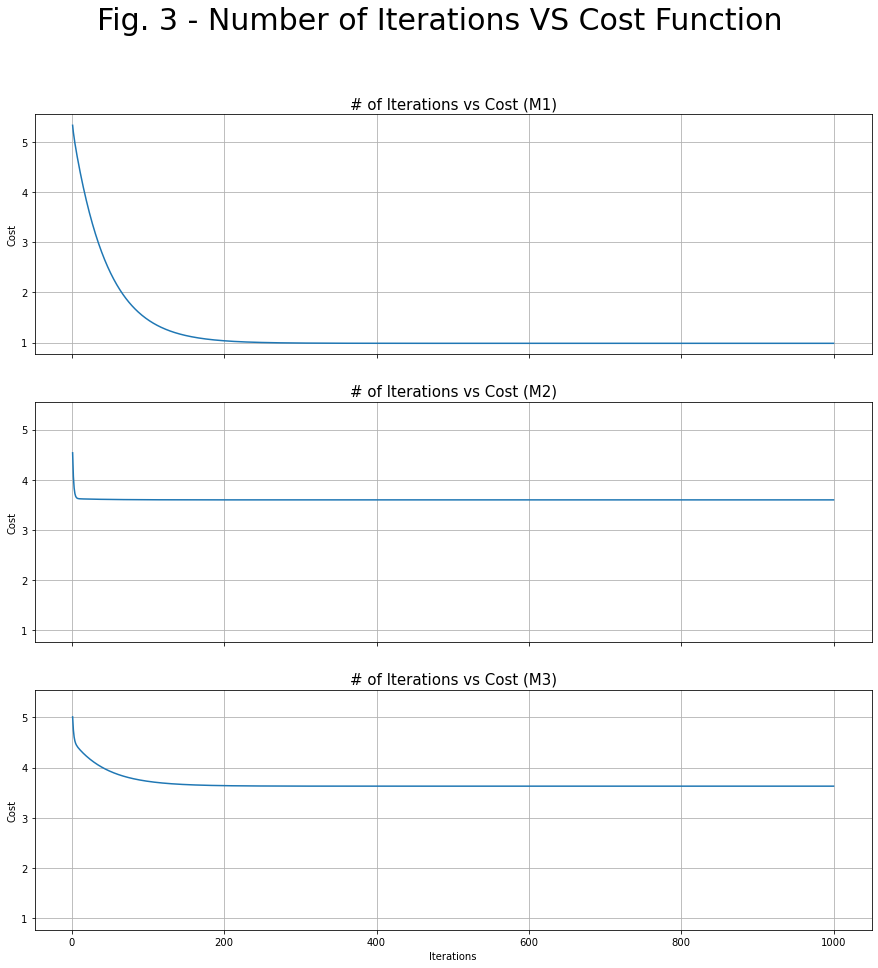

In [174]:
fig3, axs = plt.subplots(3, sharex = True, sharey = True, figsize=(15, 15))
fig3.suptitle('Fig. 3 - Number of Iterations VS Cost Function', fontsize = 30)

axs[0].plot(range(1, iterations + 1), cost_history1)
axs[0].set_title('# of Iterations vs Cost (M1)', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations + 1), cost_history2)
axs[1].set_title('# of Iterations vs Cost (M2)', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations + 1), cost_history3)
axs[2].set_title('# of Iterations vs Cost (M3)', fontsize = 15)
axs[2].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()

In [175]:
a1 = 0.2
a2 = 0.1
a3 = 0.05
a4 = 0.01

theta_M1a1, cost_M1a1 = gradient_descent(M1, Y, theta, a1, iterations)
theta_M1a2, cost_M1a2 = gradient_descent(M1, Y, theta, a2, iterations)
theta_M1a3, cost_M1a3 = gradient_descent(M1, Y, theta, a3, iterations)
theta_M1a4, cost_M1a4 = gradient_descent(M1, Y, theta, a4, iterations)

theta_M2a1, cost_M2a1 = gradient_descent(M2, Y, theta, a1, iterations)
theta_M2a2, cost_M2a2 = gradient_descent(M2, Y, theta, a2, iterations)
theta_M2a3, cost_M2a3 = gradient_descent(M2, Y, theta, a3, iterations)
theta_M2a4, cost_M2a4 = gradient_descent(M2, Y, theta, a4, iterations)

theta_M3a1, cost_M3a1 = gradient_descent(M3, Y, theta, a1, iterations)
theta_M3a2, cost_M3a2 = gradient_descent(M3, Y, theta, a2, iterations)
theta_M3a3, cost_M3a3 = gradient_descent(M3, Y, theta, a3, iterations)
theta_M3a4, cost_M3a4 = gradient_descent(M3, Y, theta, a4, iterations)

[ 5.92794892 -2.03833663] [ 5.92794892 -2.03833663] [ 5.92786428 -2.03830369] [ 5.29294728 -1.79119079]


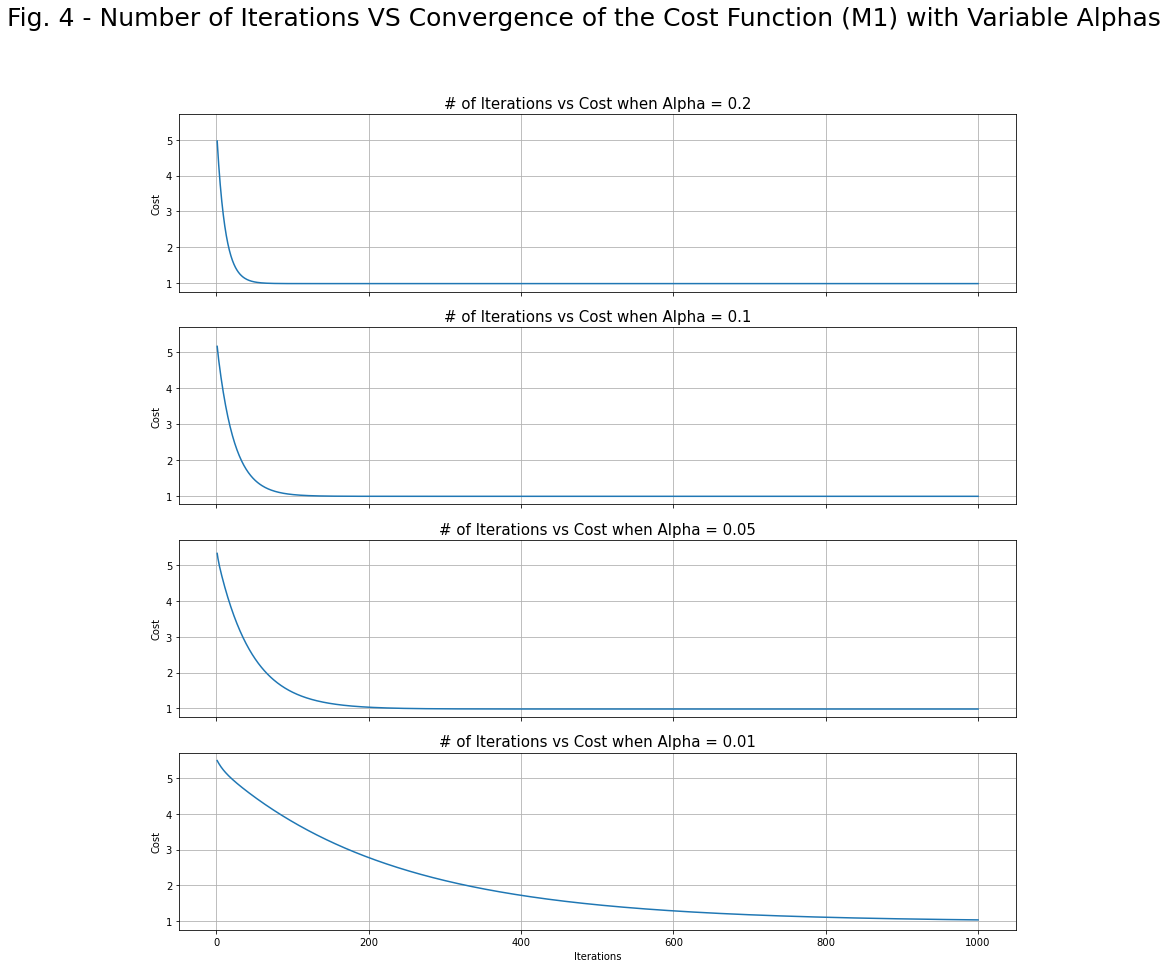

In [176]:
print(theta_M1a1, theta_M1a2, theta_M1a3, theta_M1a4)

fig4, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig4.suptitle('Fig. 4 - Number of Iterations VS Convergence of the Cost Function (M1) with Variable Alphas', fontsize = 25)

axs[0].plot(range(1, iterations + 1), cost_M1a1)
axs[0].set_title('# of Iterations vs Cost when Alpha = 0.2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations + 1), cost_M1a2)
axs[1].set_title('# of Iterations vs Cost when Alpha = 0.1', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations + 1), cost_M1a3)
axs[2].set_title('# of Iterations vs Cost when Alpha = 0.05', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations + 1), cost_M1a4)
axs[3].set_title('# of Iterations vs Cost when Alpha = 0.01', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()

[0.73606043 0.55760761] [0.73606043 0.55760761] [0.73605389 0.55761016] [0.68701995 0.57669462]


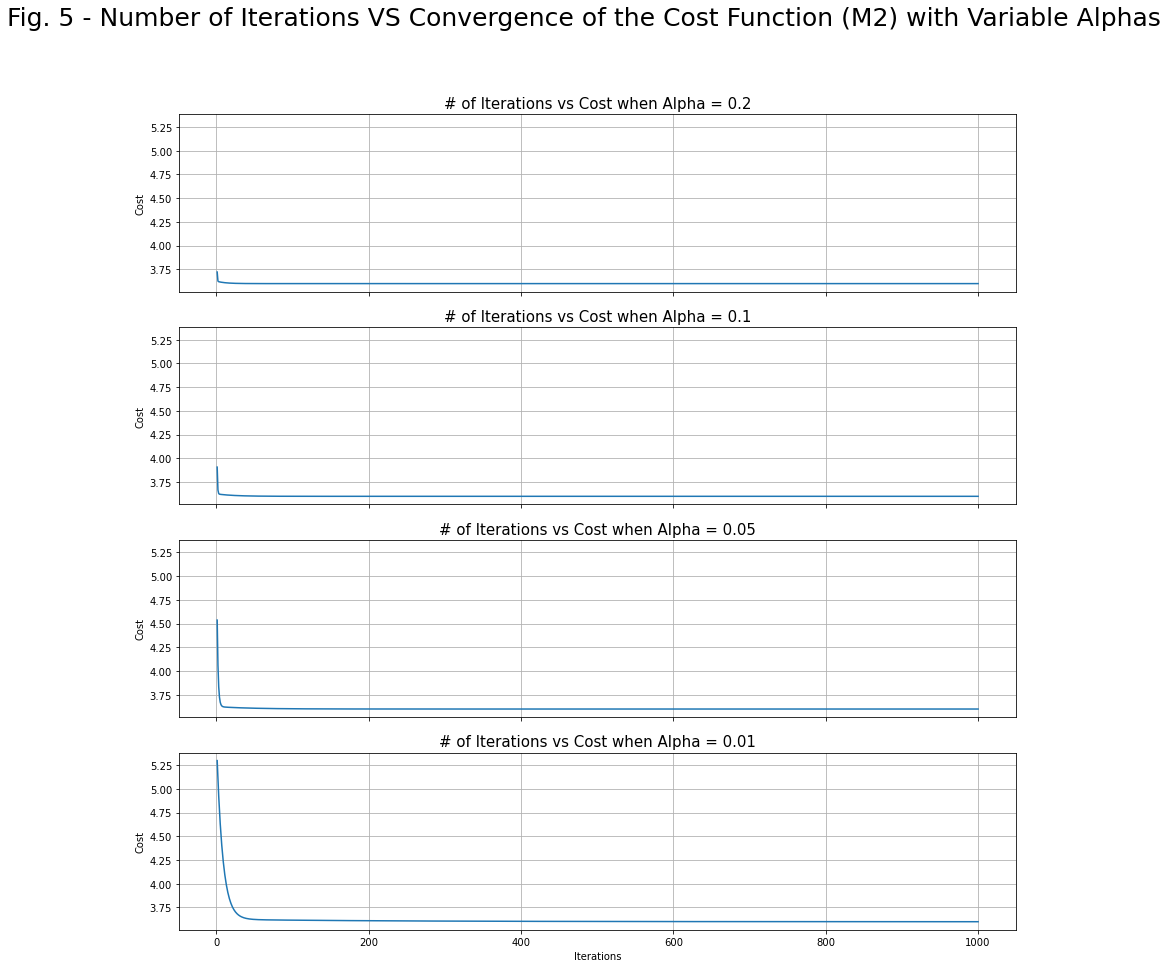

In [177]:
print(theta_M2a1, theta_M2a2, theta_M2a3, theta_M2a4)

fig5, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig5.suptitle('Fig. 5 - Number of Iterations VS Convergence of the Cost Function (M2) with Variable Alphas', fontsize = 25)

axs[0].plot(range(1, iterations + 1), cost_M2a1)
axs[0].set_title('# of Iterations vs Cost when Alpha = 0.2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations + 1), cost_M2a2)
axs[1].set_title('# of Iterations vs Cost when Alpha = 0.1', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations + 1), cost_M2a3)
axs[2].set_title('# of Iterations vs Cost when Alpha = 0.05', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations + 1), cost_M2a4)
axs[3].set_title('# of Iterations vs Cost when Alpha = 0.01', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()

[ 2.8714221  -0.52048288] [ 2.8714221  -0.52048288] [ 2.87138935 -0.52046993] [ 2.59118664 -0.40965135]


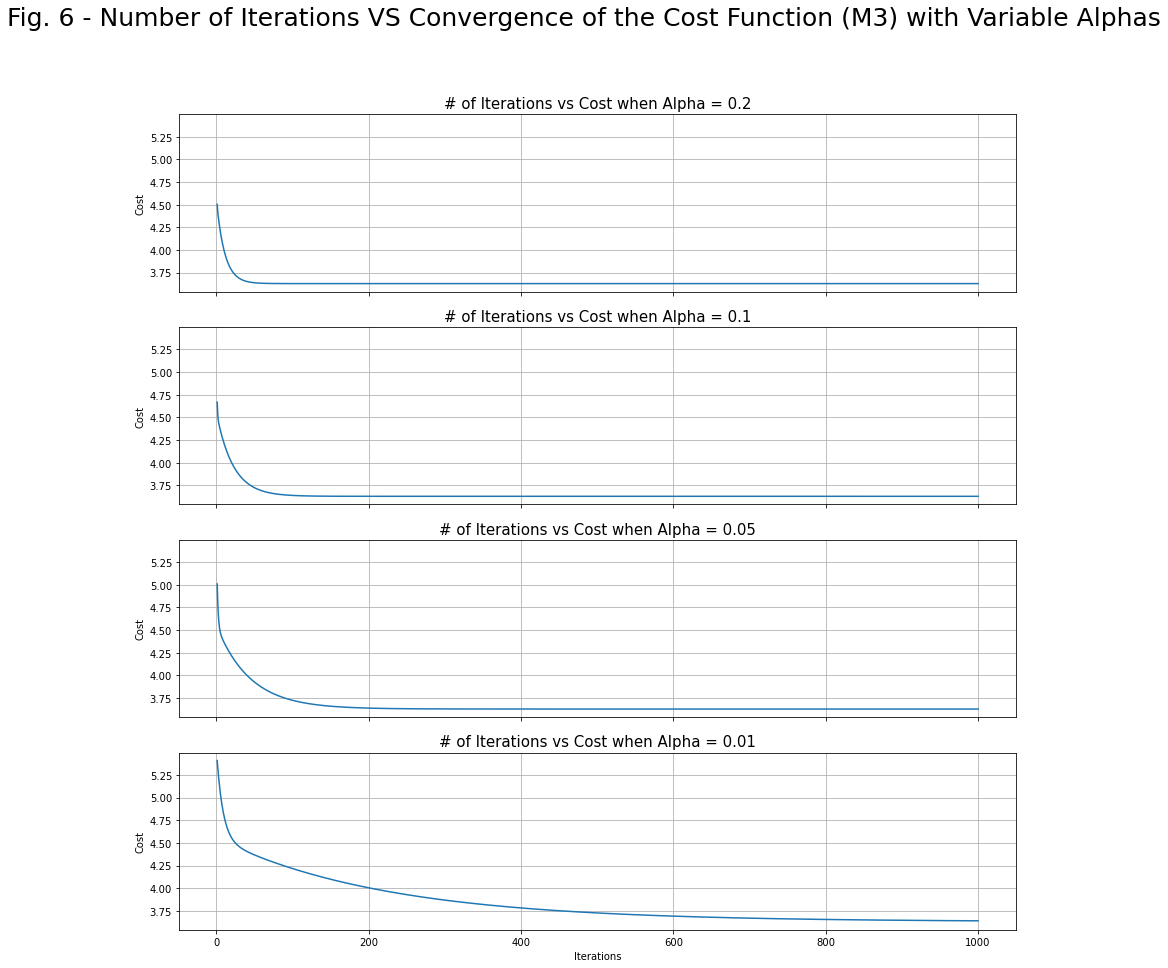

In [178]:
print(theta_M3a1, theta_M3a2, theta_M3a3, theta_M3a4)

fig6, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig6.suptitle('Fig. 6 - Number of Iterations VS Convergence of the Cost Function (M3) with Variable Alphas', fontsize = 25)

axs[0].plot(range(1, iterations + 1), cost_M3a1)
axs[0].set_title('# of Iterations vs Cost when Alpha = 0.2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations + 1), cost_M3a2)
axs[1].set_title('# of Iterations vs Cost when Alpha = 0.1', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations + 1), cost_M3a3)
axs[2].set_title('# of Iterations vs Cost when Alpha = 0.05', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations + 1), cost_M3a4)
axs[3].set_title('# of Iterations vs Cost when Alpha = 0.01', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()

# Part 2

In [179]:
theta_p2 = np.zeros(4)
iterations = 2000

M4 = np.hstack((V0, V1, V2, V3)) # stacks V0, V1, V2, and V3 to get an m by 4 matrix

theta_M4a2, cost_M4a2 = gradient_descent(M4, Y, theta_p2, a2, iterations)
theta_M4a3, cost_M4a3 = gradient_descent(M4, Y, theta_p2, a3, iterations)
theta_M4a4, cost_M4a4 = gradient_descent(M4, Y, theta_p2, a4, iterations)

print(theta_M4a2, theta_M4a3, theta_M4a4)
print(cost_M4a2[-1], cost_M4a3[-1], cost_M4a4[-1])

[ 5.31416716 -2.00371927  0.53256334 -0.26560186] [ 5.31392989 -2.00368575  0.53260255 -0.26556708] [ 4.60784132 -1.90393905  0.64927931 -0.16206885]
0.7384642415682942 0.7384642445674475 0.7650394625052138


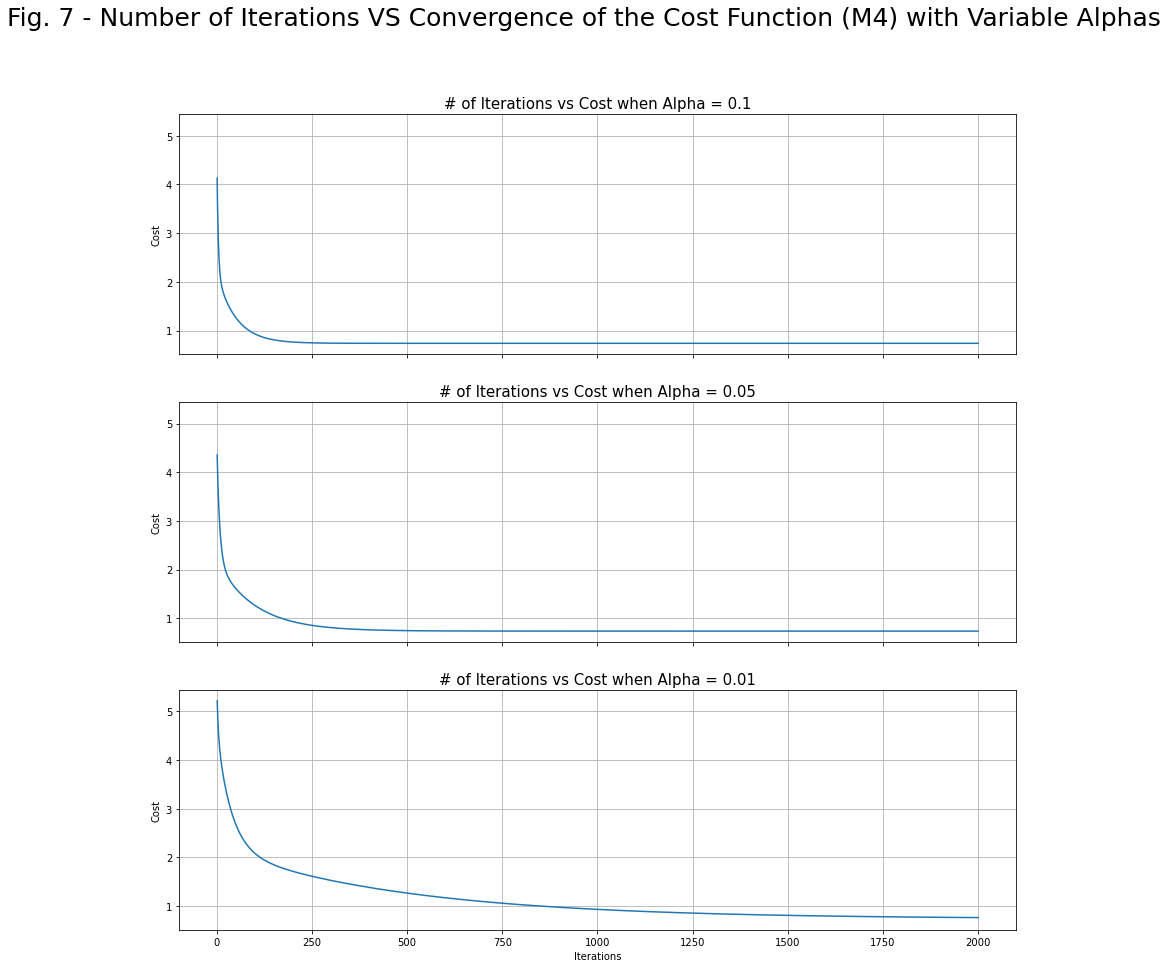

In [180]:
fig7, axs = plt.subplots(3, sharex = True, sharey = True, figsize=(15, 15))
fig7.suptitle('Fig. 7 - Number of Iterations VS Convergence of the Cost Function (M4) with Variable Alphas', fontsize = 25)

axs[0].plot(range(1, iterations + 1), cost_M4a2)
axs[0].set_title('# of Iterations vs Cost when Alpha = 0.1', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations + 1), cost_M4a3)
axs[1].set_title('# of Iterations vs Cost when Alpha = 0.05', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations + 1), cost_M4a4)
axs[2].set_title('# of Iterations vs Cost when Alpha = 0.01', fontsize = 15)
axs[2].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()

In [184]:
ay1 = [1, 1, 1, 1] # Introducing a 1 to the front of the array to create a 1x4 array (since theta_0 is always constant, multiplying by 1 is equivalent)
ay2 = [1, 2, 0, 4]
ay3 = [1, 3, 2, 1]

y1 = np.dot(ay1, theta_M4a2)
y2 = np.dot(ay2, theta_M4a2)
y3 = np.dot(ay3, theta_M4a2)

print("""The predicted values for Y given the following inputs are:
{} => {} ~= {}
{} => {} ~= {}
{} => {} ~= {}
""".format(ay1, y1, round(y1, 5), ay2, y2, round(y2, 5), ay3, y3, round(y3, 5)))

The predicted values for Y given the following inputs are:
[1, 1, 1, 1] => 3.5774093686567574 ~= 3.57741
[1, 2, 0, 4] => 0.24432117148325494 ~= 0.24432
[1, 3, 2, 1] => 0.10253417186972869 ~= 0.10253

